### Survival matrix
Assuming age-specific survival probability, i.e., that we have survival probabilities ϕ1 and ϕ2, what is the survival matrix S?

In [1]:
theta1 = 0.2
theta2 = 0.7

survival =  matrix(c(
    theta1, 0,
    0, theta2), nr = 2, byrow=TRUE)

### Ageing
Here we assume that all surviving immature individuals become mature prior to breeding. Moreover, we are considering ageing, so there is no uncertainty about about the fate of each class - all immature animals become mature and all mature animals stay mature. What do you think the ageing matrix A looks like?

In [2]:
ageing = matrix(c(
    0, 0,
    1, 1), nr = 2, byrow=TRUE)

### Births
Finally, we have the model for births. We assume that only mature animals can give birth (actually, there are no immature individuals at this point!), and define the per individual birth rate as ρ. Can you write the birth matrix B that produces the population vector of offspring (new immature individuals) and the existing mature individuals?

In [3]:
ro = 2.5
births = matrix(c(
    1, ro,
    0, 1), nr = 2, byrow=TRUE)

### Combined all together

In [4]:
immature = 10
mature = 10
initial = c(immature, mature)

sequential_change = births %*% ageing %*% survival %*% initial
all_together = matrix(c(
    theta1 * ro, theta2 * ro,
    theta1, theta2), nr=2, byrow=TRUE)

In [5]:
project_forward = function(years, initial, theta1, theta2, rho) {
    survival =  matrix(c(
    theta1, 0,
    0, theta2), nr = 2, byrow=TRUE)
    
    ageing = matrix(c(
    0, 0,
    1, 1), nr = 2, byrow=TRUE)
    
    births = matrix(c(
    1, rho,
    0, 1), nr = 2, byrow=TRUE)
    
    output = matrix(NA, 2, years + 1)
    output[,1] = initial
    for(year in 1:years) {
        output[,year + 1] = births %*% ageing %*% survival %*% output[,year]
    }
    output
}

In [7]:
theta1 = 0.2
theta2 = 0.7
rho = 2.5
immature = 10
mature = 10
initial = c(immature, mature)

population_before = project_forward(10, initial, theta1, theta2, rho)
theta2 = 0.35
population_after = project_forward(10, initial, theta1, theta2, rho)

In [8]:
proj_df <- data.frame(Abundance = c(population_before[1,],          # immature hi phi scenario
                                    population_before[2,],          # mature hi phi scenario
                                    apply(population_before,2,sum), # total hi phi scenario
                                    population_after[1,],          # immature lo phi scenario
                                    population_after[2,],          # mature lo phi scenario
                                    apply(population_after,2,sum)  # total lo phi scenario
                                    ),
                      Stage = rep(c("Immature", "Mature", "Total"),each=11, times =2),
                      Survival = rep(c("High","Low"),each=11*3),
                      Year = rep(1:11,6))
str(proj_df)

'data.frame':	66 obs. of  4 variables:
 $ Abundance: num  10 22.5 27 32.4 38.9 ...
 $ Stage    : chr  "Immature" "Immature" "Immature" "Immature" ...
 $ Survival : chr  "High" "High" "High" "High" ...
 $ Year     : int  1 2 3 4 5 6 7 8 9 10 ...


In [12]:
options(warn=-1)
library(ggplot2)
library(ggthemes)

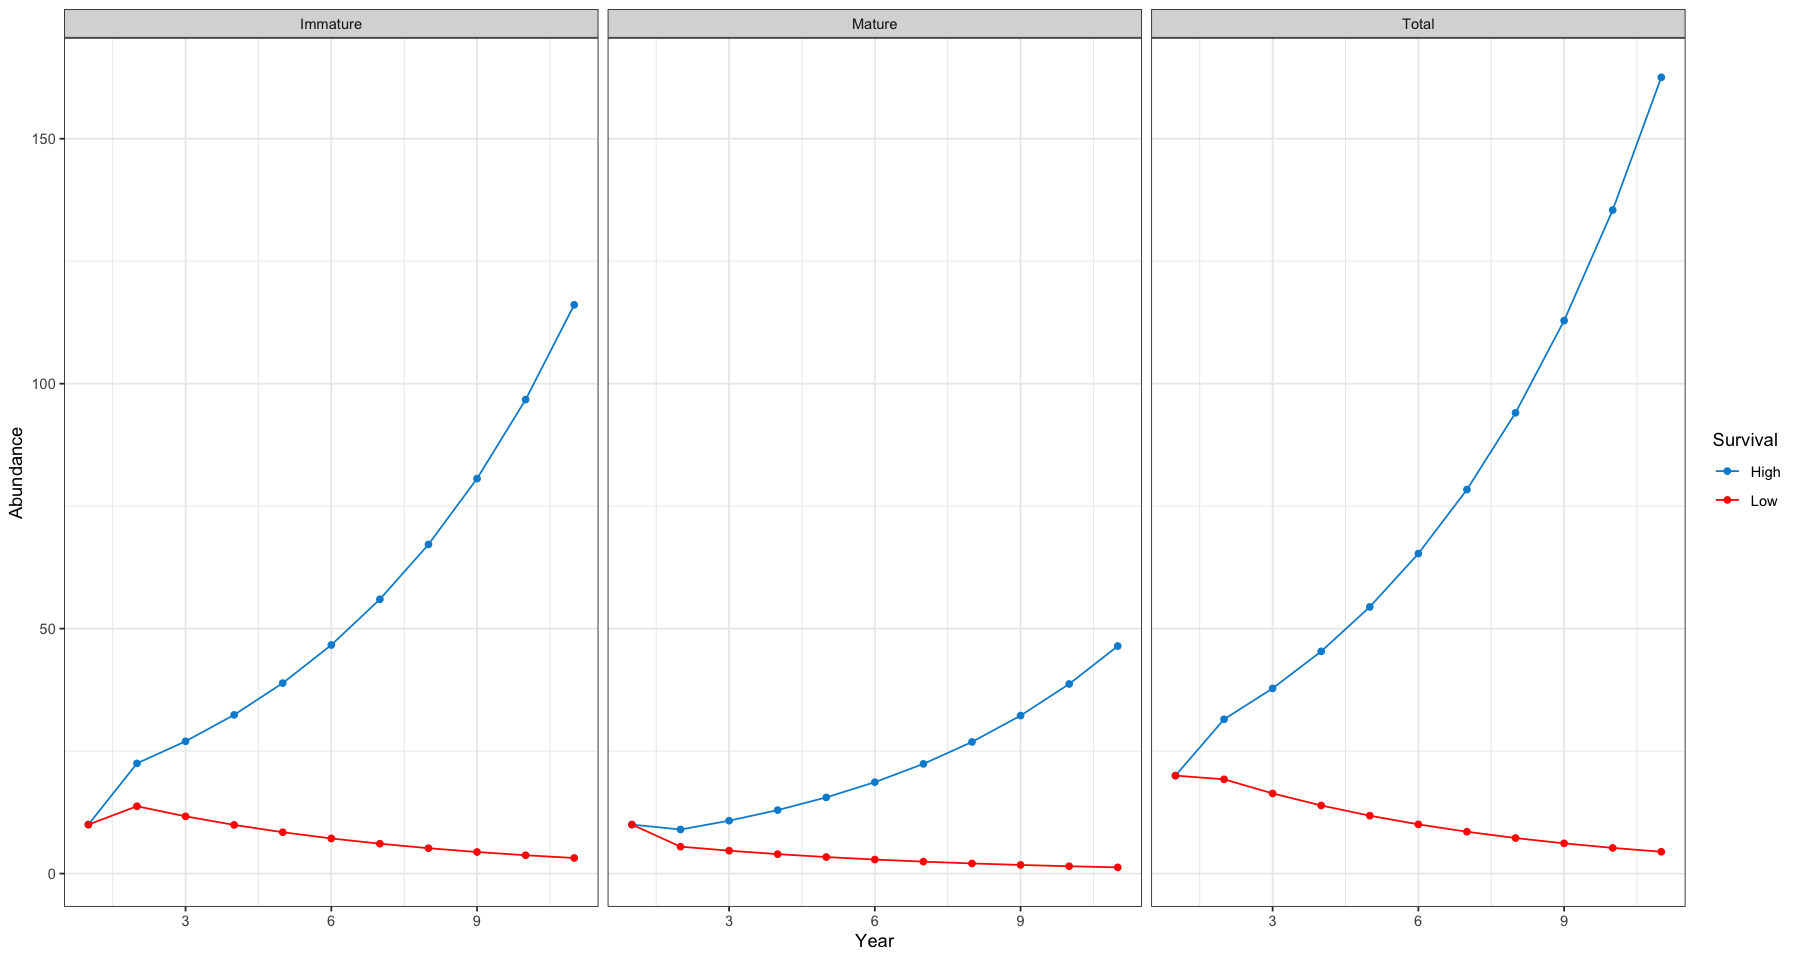

In [14]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data=proj_df, aes(x=Year, y=Abundance, group=Survival, color=Survival, fill=Survival)) + 
  geom_line() +
  geom_point() + 
  facet_wrap(.~Stage) + 
  theme_bw() + 
  scale_color_fivethirtyeight() +
  scale_fill_fivethirtyeight()

In [ ]:
population = project_forward(10, initial)
matplot(t(population), type="l")